<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Missing-value" data-toc-modified-id="Missing-value-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Missing value</a></span></li><li><span><a href="#Column-Types" data-toc-modified-id="Column-Types-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Types</a></span></li><li><span><a href="#Encoding-categorical-variables" data-toc-modified-id="Encoding-categorical-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Encoding categorical variables</a></span></li><li><span><a href="#outlier" data-toc-modified-id="outlier-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>outlier</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Impute-and-Scale" data-toc-modified-id="Impute-and-Scale-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Impute and Scale</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Prediction</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Polynomial-features" data-toc-modified-id="Polynomial-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Polynomial features</a></span></li><li><span><a href="#Domain-knowledge-features" data-toc-modified-id="Domain-knowledge-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Domain knowledge features</a></span></li><li><span><a href="#Bureau" data-toc-modified-id="Bureau-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bureau</a></span><ul class="toc-item"><li><span><a href="#Number-of-pre-loans-per-applicant" data-toc-modified-id="Number-of-pre-loans-per-applicant-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Number of pre loans per applicant</a></span></li><li><span><a href="#Numeric-information" data-toc-modified-id="Numeric-information-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Numeric information</a></span></li><li><span><a href="#Test-of-bureau-numerical-new-variable-with-xgboost" data-toc-modified-id="Test-of-bureau-numerical-new-variable-with-xgboost-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Test of bureau numerical new variable with xgboost</a></span></li><li><span><a href="#Test-of-bureau-numerical-variable-with-random-forest" data-toc-modified-id="Test-of-bureau-numerical-variable-with-random-forest-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Test of bureau numerical variable with random forest</a></span></li></ul></li><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Hyperparameters tuning</a></span><ul class="toc-item"><li><span><a href="#Best-hyper-parameters" data-toc-modified-id="Best-hyper-parameters-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Best hyper parameters</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Plot-function-(from-Kaggle)" data-toc-modified-id="Plot-function-(from-Kaggle)-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Plot function (from Kaggle)</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#XG-Boost" data-toc-modified-id="XG-Boost-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>XG Boost</a></span></li></ul></li></ul></div>

# Projet 4

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score

In [4]:
from sklearn.model_selection import RandomizedSearchCV #GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [5]:
import xgboost as xgb

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from scipy import stats

In [8]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Dropdown,interact, interactive, fixed, interact_manual

In [9]:
app_test = pd.read_csv('X_dev.csv')

In [10]:
app_train = pd.read_csv('X_train.csv')

In [11]:
labels_test=app_test[['SK_ID_CURR','TARGET']]
app_test = app_test.drop(columns = ['TARGET'])

In [12]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,233029,Cash loans,F,N,N,0,135000.0,792346.5,26185.5,684000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,155722,Cash loans,M,N,N,2,270000.0,755190.0,38686.5,675000.0,...,0,0,0,0,0.0,1.0,0.0,0.0,0.0,4.0
2,122508,Cash loans,M,N,Y,2,180000.0,512446.5,40486.5,463500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,1.0
3,308638,Cash loans,F,Y,N,0,112500.0,1078200.0,34911.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,288856,Cash loans,M,Y,Y,0,112500.0,113760.0,7533.0,90000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis

In [13]:
app_train['TARGET'].value_counts()

0    226125
1     19883
Name: TARGET, dtype: int64

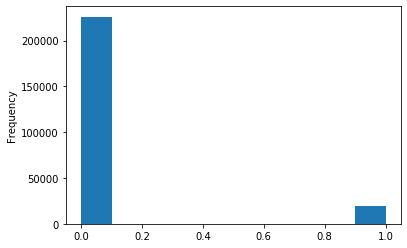

In [14]:
app_train['TARGET'].astype(int).plot.hist()

Remark from Kaggle: Imbalance class problem http://www.chioka.in/class-imbalance-problem/

### Missing value


In [15]:
miss_val = app_train.isnull().sum().sort_values(ascending=False).to_frame(name='Miss_value')
miss_val['Miss_value_100'] = miss_val['Miss_value']*100 / len(app_train)
miss_val[miss_val['Miss_value'] != 0].head(10)


,Miss_value,Miss_value_100
COMMONAREA_MEDI,171718,69.801795
COMMONAREA_AVG,171718,69.801795
COMMONAREA_MODE,171718,69.801795
NONLIVINGAPARTMENTS_MODE,170583,69.340428
NONLIVINGAPARTMENTS_MEDI,170583,69.340428
NONLIVINGAPARTMENTS_AVG,170583,69.340428
FONDKAPREMONT_MODE,168019,68.298185
LIVINGAPARTMENTS_MEDI,167918,68.257130
LIVINGAPARTMENTS_MODE,167918,68.257130
LIVINGAPARTMENTS_AVG,167918,68.257130


In [16]:
print(len(miss_val[miss_val['Miss_value'] != 0]))

66


In [17]:
col_miss_value = miss_val[miss_val['Miss_value'] != 0].index

### Column Types

In [18]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Number of unique entries for categorical columns.

In [19]:
#nunique :Count distinct observations over requested axis.
#Return Series with number of distinct observations. default dropna=True.
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding categorical variables

Label encoding for columns <= 2 differents values

In [20]:
le = LabelEncoder()
count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            #le.fit fit the label encoder for each value of the columns
            le.fit(app_train[col])
            #le.transform return an array with the encoding value
            #To be done on both train and test
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            #counter to keep track
            count += 1

print('%d columns were label encoded' % count)

3 columns were label encoded


one-hot for the rest of the object columns

In [21]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [22]:
app_train.shape

(246008, 242)

In [23]:
app_test.shape

(61503, 242)

Some cat variables were not present in the test test hence the difference shape.

Aligning Training and Testing Data

In [24]:
#first we extract the target columns from the training data
train_labels = app_train['TARGET']


In [25]:
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
#join inner to get rid off the columns present in app_train and not in app_test
#and then bring target back to app train
app_train['TARGET'] = train_labels

### outlier

In [26]:
iqr_d = stats.iqr(app_train['DAYS_EMPLOYED'])
q1 = app_train['DAYS_EMPLOYED'].quantile(0.25)
q3 = app_train['DAYS_EMPLOYED'].quantile(0.45)
limdn = q1 - 1.5*iqr_d
limup = q3 + 1.5*iqr_d

In [27]:
len(app_train[(app_train['DAYS_EMPLOYED'] > limup)|
             (app_train['DAYS_EMPLOYED']< limdn)])

57846

In [28]:
app_train['DAYS_EMPLOYED'].describe()

count    246008.000000
mean      63962.521442
std      141397.010381
min      -17912.000000
25%       -2759.000000
50%       -1211.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [29]:
def iqr_outlier(data):
    iqr = stats.iqr(data)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    limdn = q1 - 1.5*iqr
    limup = q3 + 1.5*iqr
    l = len(data[(data<limdn)|(data>limup)])
    return l

In [30]:
iqr_outlier(app_train['DAYS_EMPLOYED'])

57846

In [31]:
#t pour threshold
def z_outlier(data, t):
    z = stats.zscore(data)
    l = len(data[(np.abs(z)>t)])
    return l

In [32]:
z_outlier(app_train['DAYS_EMPLOYED'], 2)

44397

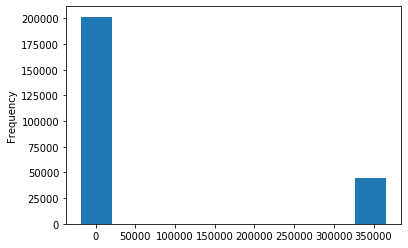

In [33]:
app_train['DAYS_EMPLOYED'].plot.hist();

In [34]:

Name = []
Zscore = []
Iqr = []
for col in app_train:
    if (app_train[col].dtype == 'float64') or (app_train[col].dtype == 'int64'):
        Name.append(col)
        Zscore.append(z_outlier(app_train[col], 3))
        Iqr.append(iqr_outlier(app_train[col]))


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [35]:
detect_outlier = pd.DataFrame({'Name' : Name,
                              'zscore' : Zscore,
                              'iqr' : Iqr})

In [36]:
  d_o = detect_outlier[~((detect_outlier['zscore'] == 0) & (detect_outlier['iqr'] == 0))]

In [37]:
d_o.head(15)

,Name,zscore,iqr
1,CNT_CHILDREN,3364,3364
2,AMT_INCOME_TOTAL,214,11226
3,AMT_CREDIT,2609,5235
6,REGION_POPULATION_RELATIVE,6745,6745
8,DAYS_EMPLOYED,0,57846
9,DAYS_REGISTRATION,580,505
12,FLAG_MOBIL,1,1
13,FLAG_EMP_PHONE,0,44409
14,FLAG_WORK_PHONE,0,48934
15,FLAG_CONT_MOBILE,456,456


In [38]:
def viz_out(col):
    app_train[col].plot.hist()
    return app_train[col].describe(), app_train[col].value_counts()



interact(viz_out, col=d_o['Name'])

interactive(children=(Dropdown(description='col', options=('CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', '…

<function __main__.viz_out(col)>

**Outlier interpretation**
- CNT children : max = 19 
- AMT Income total : possible outlier max = 117 000 000
- AMT credit : credit amount of the loan. 
- Region population Relative : NSTR
- DAYS Employed : clear anomalies. see next section
- Days registration : max = 67 years quant75 = 20.5 years. def= how many days      before the application did client change his registration, time relative to the application
- ALL FLAG : NSTR
- region rating client : NSTR
- the rest = flag NSTR

**AMT Income total**

In [39]:
outlier_inc = app_train[stats.zscore(app_train['AMT_INCOME_TOTAL']) > 3]
print("Outlier income default on {:0.2f} %".format(100 * outlier_inc['TARGET'].mean()))

Outlier income default on 5.61 %


Surprinsgly people with high income still default on loan. Which is counter intuitive.

In [40]:
def iqr_outlier_df(data, t):
    iqr = stats.iqr(data)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    limdn = q1 - 1.5*iqr
    limup = q3 + 1.5*iqr
    if t=='sup':
        return limup
    if t=='inf':
        return limdn
    else:
        return data[(data<limdn)|(data>limup)]
  

In [41]:
lim = iqr_outlier_df(app_train['AMT_INCOME_TOTAL'], "sup")
print("Outlier income default on {:0.2f} % with irq"
      .format(100 * app_train[app_train['AMT_INCOME_TOTAL']>lim]['TARGET'].mean()))

Outlier income default on 5.80 % with irq


In [42]:
print("Non Outlier income default on {:0.2f} % with irq"
      .format(100 * app_train[app_train['AMT_INCOME_TOTAL']<lim]['TARGET'].mean()))

Non Outlier income default on 8.20 % with irq


**Days Employment**


In [43]:
app_train['DAYS_EMPLOYED'].value_counts()

 365243    44397
-200         126
-212         123
-230         122
-196         116
           ...  
-12367         1
-13904         1
-11725         1
-13648         1
 0             1
Name: DAYS_EMPLOYED, Length: 12069, dtype: int64

In [44]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.46% of loans
There are 44397 anomalous days of employment


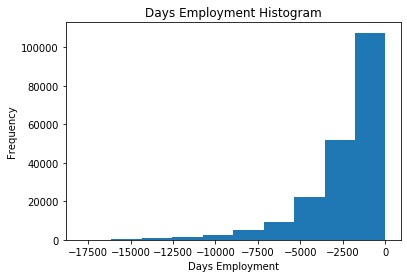

In [45]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

same to the test dataset

In [46]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 10977 anomalies in the test data out of 61503 entries


### Correlations

In [47]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.042102
FLAG_DOCUMENT_3                                      0.043879
FLAG_EMP_PHONE                                       0.045066
REG_CITY_NOT_LIVE_CITY                               0.046282
NAME_EDUCATION_TYPE_Secondary / secondary special    0.048568
REG_CITY_NOT_WORK_CITY                               0.051325
DAYS_ID_PUBLISH                                      0.051918
CODE_GENDER_M                                        0.053534
DAYS_LAST_PHONE_CHANGE                               0.055383
NAME_INCOME_TYPE_Working                             0.057175
REGION_RATING_CLIENT                                 0.059217
REGION_RATING_CLIENT_W_CITY                          0.061117
DAYS_EMPLOYED                                        0.073386
DAYS_BIRTH                                           0.077571
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Text(0, 0.5, 'Count')

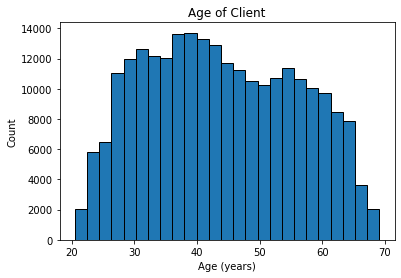

In [48]:
plt.hist(app_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

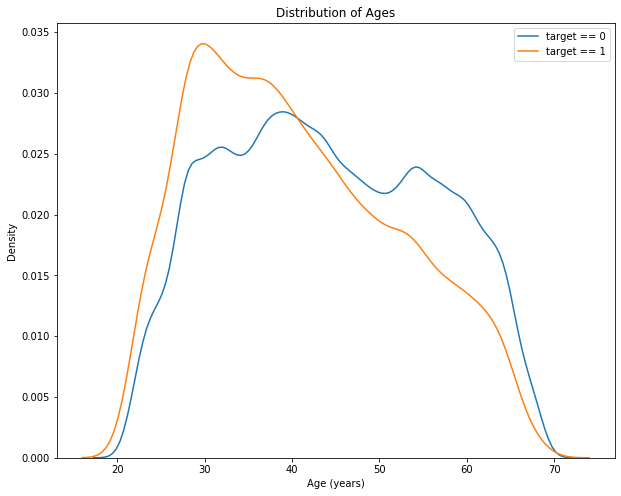

In [49]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [50]:
#Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],
                                  bins = np.linspace(20, 70, num = 11))
age_data.head(10)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,0,-23979,65.695890,"(65.0, 70.0]"
1,0,-16721,45.810959,"(45.0, 50.0]"
2,1,-21814,59.764384,"(55.0, 60.0]"
3,0,-18635,51.054795,"(50.0, 55.0]"
4,0,-14404,39.463014,"(35.0, 40.0]"
5,0,-18387,50.375342,"(50.0, 55.0]"
6,0,-20641,56.550685,"(55.0, 60.0]"
7,0,-15280,41.863014,"(40.0, 45.0]"
8,0,-16973,46.501370,"(45.0, 50.0]"
9,0,-16377,44.868493,"(40.0, 45.0]"


In [51]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.125193,-8531.573954,23.374175
"(25.0, 30.0]",0.111488,-10153.403120,27.817543
"(30.0, 35.0]",0.101851,-11855.917323,32.481965
"(35.0, 40.0]",0.088906,-13706.952341,37.553294
"(40.0, 45.0]",0.078857,-15497.646759,42.459306
"(45.0, 50.0]",0.074754,-17324.499715,47.464383
"(50.0, 55.0]",0.066846,-19196.737143,52.593800
"(55.0, 60.0]",0.055574,-20982.351194,57.485894
"(60.0, 65.0]",0.054032,-22782.574634,62.418013


Text(0.5, 1.0, 'Failure to Repay by Age Group')

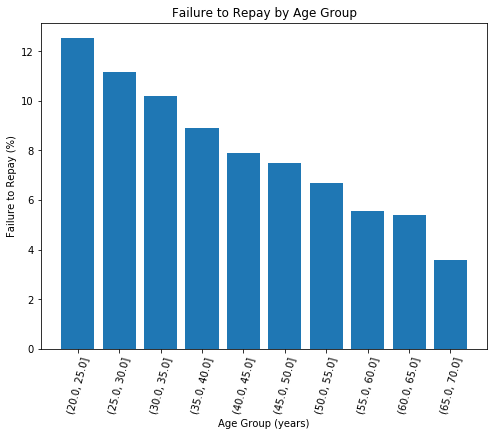

In [52]:
plt.figure(figsize = (8, 6))
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])


plt.xticks(rotation = 75) 
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')


In [53]:
app_train['CODE_GENDER_M'].value_counts()

0    162081
1     83927
Name: CODE_GENDER_M, dtype: int64

In [54]:
male = app_train[app_train['CODE_GENDER_M'] == 1]
female = app_train[app_train['CODE_GENDER_M'] != 1]
print('The male default on %0.2f%% of loans' % (100 * male['TARGET'].mean()))
print('The female default on %0.2f%% of loans' % (100 * female['TARGET'].mean()))
#print('There are %d anomalous days of employment' % len(anom))

The male default on 10.11% of loans
The female default on 7.03% of loans


## Logistic Regression

### Impute and Scale

In [55]:
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()


# Median imputation of missing values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (246008, 242)
Testing data shape:  (61503, 242)


### Train model

In [56]:
# Make the model with the specified regularization parameter from kaggle
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [57]:
#This returns an m x 2 array where m is the number of observations. 
#The first column is the probability of the target being 0 and the 
#second column is the probability of the target being 1 
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,233029,0.082654
1,155722,0.118456
2,122508,0.060880
3,308638,0.094713
4,288856,0.087728


In [58]:
labels_test.head()

,SK_ID_CURR,TARGET
0,233029,0
1,155722,0
2,122508,1
3,308638,0
4,288856,0


In [59]:
roc_auc_score(labels_test['TARGET'], submit['TARGET'])

0.6894679579063102

In [60]:

score = pd.DataFrame(columns = ['Features','Score'])
row = ['Log Reg', roc_auc_score(labels_test['TARGET'], submit['TARGET'])]
#row = pd.DataFrame(row)
score.loc[0] = row


In [61]:
score = pd.DataFrame(columns = ['Features','Score'])
def score_track(feat, s):    
    row = {'Features': feat,
          'Score': s} 
    return score.append(row, ignore_index = True)
  


In [62]:
score = score_track('Log reg', roc_auc_score(labels_test['TARGET'], submit['TARGET']))

In [63]:
score

,Features,Score
0,Log reg,0.689468


## Random Forest

In [64]:
random_forest = RandomForestClassifier(n_estimators = 100,
                                       random_state = 50,
                                       verbose = 1,
                                       n_jobs = -1)

In [65]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features,
                                    'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


In [66]:
submit2 = app_test[['SK_ID_CURR']]
submit2['TARGET'] = predictions

# Save the submission dataframe
submit2.to_csv('random_forest_baseline.csv', index = False)

submit2.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,233029,0.03
1,155722,0.29
2,122508,0.02
3,308638,0.05
4,288856,0.07


In [67]:
roc_auc_score(labels_test['TARGET'], submit2['TARGET'])

0.7085138741810726

In [68]:
score = score_track('Random forest', roc_auc_score(labels_test['TARGET'], submit2['TARGET']))
score

,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514


## XGBoost

In [69]:
#def model
xgmodel = xgb.XGBClassifier()

#fit on train set
xgmodel.fit(train, train_labels)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
#make prediction
xg_prediction = xgmodel.predict_proba(test)

In [71]:
xg_prediction

array([[0.96728134, 0.03271866],
       [0.7945093 , 0.20549068],
       [0.9556746 , 0.04432539],
       ...,
       [0.95276594, 0.04723409],
       [0.87218195, 0.12781803],
       [0.97265154, 0.02734845]], dtype=float32)

In [72]:
submit3 = app_test[['SK_ID_CURR']]
submit3['TARGET'] = xg_prediction[:, 1]
submit3.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SK_ID_CURR,TARGET
0,233029,0.032719
1,155722,0.205491
2,122508,0.044325
3,308638,0.036541
4,288856,0.032134


In [73]:
score = score_track('xgboost', roc_auc_score(labels_test['TARGET'], submit3['TARGET']))
score

,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514
2,xgboost,0.752845


## Polynomial features

In [74]:
# new df 
poly_features = app_train[['EXT_SOURCE_1',
                           'EXT_SOURCE_2',
                           'EXT_SOURCE_3',
                           'DAYS_BIRTH',
                           'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1',
                               'EXT_SOURCE_2',
                               'EXT_SOURCE_3',
                               'DAYS_BIRTH']]

In [75]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

#save and store target 
poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

#impute missing values (fit only on training set)
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

#create polynomial object
poly_transformer = PolynomialFeatures(degree = 3)

# Train on train set
poly_transformer.fit(poly_features)

#transform train and test
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (246008, 35)


In [76]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [77]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193755
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189492
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176281
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172162
EXT_SOURCE_1 EXT_SOURCE_2                -0.166753
EXT_SOURCE_1 EXT_SOURCE_3                -0.164042
EXT_SOURCE_2                             -0.160619
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156908
EXT_SOURCE_3                             -0.155518
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.151002
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155983
EXT_SOURCE_2 DAYS_BIRTH                 0.156999
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.180994
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [78]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (246008, 277)
Testing data with polynomial features shape:   (61503, 277)


Impute and scale for dataset avec polynomial features

In [79]:
poly_features_names = list(app_train_poly.columns)

# Impute polynomial features
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

In [80]:
xgmodel_poly = xgb.XGBClassifier()

#fit on train set
xgmodel_poly.fit(poly_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
xg_poly_predictions = xgmodel_poly.predict_proba(poly_features_test)

In [82]:
submit4 = app_test[['SK_ID_CURR']]
submit4['TARGET'] = xg_poly_predictions[:, 1]
score = score_track('xg_poly', roc_auc_score(labels_test['TARGET'], submit4['TARGET']))
score

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514
2,xgboost,0.752845
3,xg_poly,0.753731


## Domain knowledge features

## Bureau

In [83]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Number of pre loans per applicant

In [84]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [85]:
previous_loan_counts['previous_loan_counts'].describe()

count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: previous_loan_counts, dtype: float64

In [86]:
nul_PLC = previous_loan_counts.isnull().sum().sort_values(ascending=False).to_frame(name='Miss_value')
nul_PLC.head()

,Miss_value
previous_loan_counts,0
SK_ID_CURR,0


Merge training data

In [87]:
app_train_poly_plc = app_train_poly.merge(previous_loan_counts,
                 on = 'SK_ID_CURR',
                 how = 'left')
app_train_poly_plc['previous_loan_counts'].isnull().sum()

35197

In [88]:
#fill the null with 0
app_train_poly_plc['previous_loan_counts'] = app_train_poly_plc['previous_loan_counts'].fillna(0)

Merge on test data

In [89]:
app_test_poly_plc = app_test_poly.merge(previous_loan_counts,
                 on = 'SK_ID_CURR',
                 how = 'left')
app_test_poly_plc['previous_loan_counts'] = app_test_poly_plc['previous_loan_counts'].fillna(0)

### Numeric information

In [90]:
bureau_agg = bureau.drop(
    columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR',
                                       as_index = False).agg(['count',
                                                             'mean',
                                                             'max',
                                                             'min',
                                                             'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

New columns names for level 1 index

In [91]:
#store initial name
columns = ['SK_ID_CURR']

for var in bureau_agg.columns.levels[0]:
    #skip id name
    if var != 'SK_ID_CURR':
        #get stats names
        for stat in bureau_agg.columns.levels[1][:-1]:
            #make a new name
            columns.append('bureau_%s_%s' % (var, stat))

In [92]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


Merge on training data

In [93]:
app_train_poly_bur = app_train_poly_plc.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')


In [94]:
app_train_poly_bur.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,118129,0,1,1,0,157500.0,254700.0,15579.0,225000.0,0.018801,...,9.0,-552.333333,-20.0,-1625.0,-4971.0,3.0,29895.75,29895.75,29895.75,89687.25
1,437656,0,1,1,1,180000.0,1051294.5,30870.0,918000.0,0.018801,...,6.0,-745.500000,-9.0,-2397.0,-4473.0,0.0,NaN,NaN,NaN,0.00
2,317631,0,0,1,0,99000.0,343377.0,11097.0,283500.0,0.024610,...,25.0,-608.440000,-3.0,-2440.0,-15211.0,0.0,NaN,NaN,NaN,0.00
3,176655,0,0,1,0,117000.0,346500.0,14679.0,346500.0,0.030755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141216,0,1,0,0,270000.0,450000.0,35685.0,450000.0,0.046220,...,1.0,-784.000000,-784.0,-784.0,-784.0,0.0,NaN,NaN,NaN,0.00


Merge on test data

In [95]:
app_test_poly_bur = app_test_poly_plc.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')


### Test of bureau numerical new variable with xgboost

In [96]:
# Impute polynomial features
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

X_imp = imputer.fit_transform(app_train_poly_bur)
X_test_imp = imputer.transform(app_test_poly_bur)

# Scale polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

X_scale = scaler.fit_transform(X_imp)
X_test_scale = scaler.transform(X_test_imp)

In [97]:
xgmodel_burr = xgb.XGBClassifier()

#fit on train set
xgmodel_burr.fit(X_scale, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
xg_burr_predictions = xgmodel_burr.predict_proba(X_test_scale)

In [99]:
submit5 = app_test[['SK_ID_CURR']]
submit5['TARGET'] = xg_burr_predictions[:, 1]
score = score_track('xg_burr', roc_auc_score(labels_test['TARGET'], submit5['TARGET']))
score

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514
2,xgboost,0.752845
3,xg_poly,0.753731
4,xg_burr,0.756839


### Test of bureau numerical variable with random forest

In [100]:
random_forest_burr = RandomForestClassifier(n_estimators = 100,
                                       random_state = 50,
                                       verbose = 1,
                                       n_jobs = -1)

In [101]:
# Train on the training data
random_forest.fit(X_scale, train_labels)


# Make predictions on the test data
predictions = random_forest.predict_proba(X_test_scale)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.5s finished


In [102]:
submit6 = app_test[['SK_ID_CURR']]
submit6['TARGET'] = predictions
score = score_track('random_f_burr', roc_auc_score(labels_test['TARGET'], submit6['TARGET']))
score

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514
2,xgboost,0.752845
3,xg_poly,0.753731
4,xg_burr,0.756839
5,random_f_burr,0.714592


## Hyperparameters tuning

In [103]:
params = {
    #min sum of weight of all observations required. control overfitting
        'min_child_weight': [1, 5, 10],
    #A node is split only when the resulting split gives a positive reduction 
    #in the loss function. Gamma specifies the minimum loss reduction required 
    #to make a split.
        'gamma': [0.5, 1, 1.5, 2, 5],
    #Denotes the fraction of observations to be randomly samples for each tree
        'subsample': [0.6, 0.8, 1.0],
    #Denotes the fraction of observations to be randomly samples for each tree
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [104]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [105]:
random_search = RandomizedSearchCV(xgmodel_burr,
                                   param_distributions=params,
                                   n_iter=param_comb, 
                                   scoring='roc_auc',
                                   n_jobs=4, 
                                   cv=folds, #skf.split(X,Y)
                                   verbose=3,
                                   random_state=1001 )

In [106]:
random_search.fit(X_scale, train_labels)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depreca

### Best hyper parameters

In [107]:
print(random_search.best_params_)

{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}


In [108]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [109]:
predictionsHP =  random_search.predict_proba(X_test_scale)

In [110]:
submit7 = app_test[['SK_ID_CURR']]
submit7['TARGET'] = predictionsHP[:,1]
score = score_track('xg_hp_burr', roc_auc_score(labels_test['TARGET'], submit7['TARGET']))
score

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Features,Score
0,Log reg,0.689468
1,Random forest,0.708514
2,xgboost,0.752845
3,xg_poly,0.753731
4,xg_burr,0.756839
5,random_f_burr,0.714592
6,xg_hp_burr,0.763355


## Feature importance

### Plot function (from Kaggle)

In [112]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [118]:
# Extract feature name
features_names = list(app_train_poly_bur)

### Logistic Regression

In [133]:

# Extract value
feature_importance_values_log = log_reg.coef_[0]

# creaste dataframe (use the first extract of the columns name in 2.1)
feature_importances_log = pd.DataFrame({'feature': features, 'importance': feature_importance_values_log})


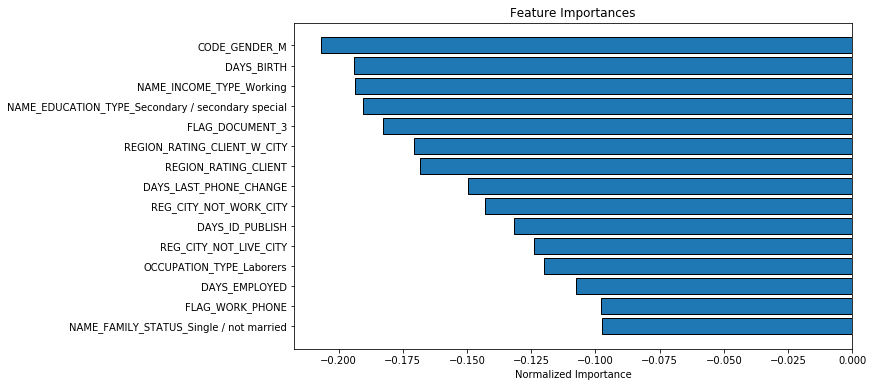

In [134]:
feature_importances_sorted = plot_feature_importances(feature_importances_log)

### Random forest

In [120]:
# Extract value
feature_importance_values = random_forest.feature_importances_

# creaste dataframe
feature_importances_df = pd.DataFrame({'feature': features_names, 'importance': feature_importance_values})

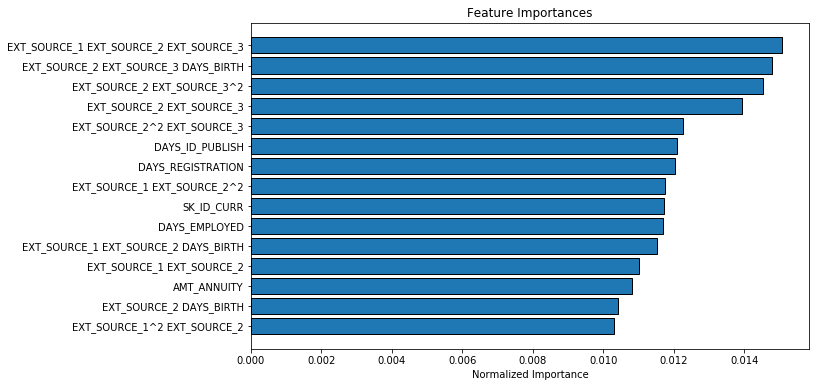

In [121]:
feature_importances_sorted = plot_feature_importances(feature_importances_df)

### XG Boost

In [122]:
# Extract value
feature_importance_values_xg = xgmodel_burr.feature_importances_

# creaste dataframe
feature_importances_xg = pd.DataFrame({'feature': features_names, 'importance': feature_importance_values_xg})

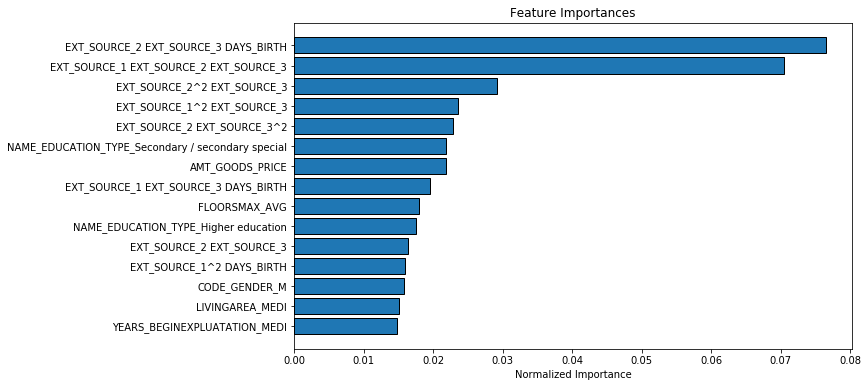

In [123]:
feature_importances_sorted = plot_feature_importances(feature_importances_xg)